No handles with labels found to put in legend.


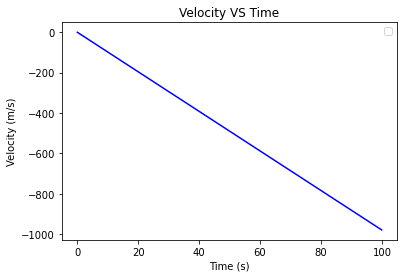

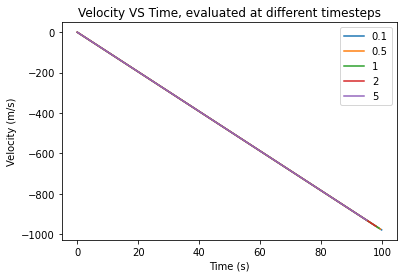

In [1]:
#Solving dv/dt by using the Euler Method

import matplotlib.pyplot as plt
from numpy import linspace, arange

#Define Variables

#initial conditions v(t=0)
#timesteps
timesteps = [0.1,0.5,1,2,5]
steps = [10,100,1000,500]
v = 0.0
g = 9.8
vpoints = []
#interval over which to plot
a = 0.0
b = 100.0 

#solve for one time step
# set up arrays of values t, x
tpoints = arange(a,b,0.1)
xpoints = []
for t in tpoints:
    xpoints.append(v)
    v += 0.1*(-g) # advance x with an Euler step
    
# plot the solution
plt.plot(tpoints, xpoints,'b-')
#plt.xlim(a,b)
#plt.ylim(-2000,0)
plt.legend(loc="best")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.title("Velocity VS Time")
plt.show()

#Define Euler Scheme
for t in timesteps:
    v = 0.0
    vpoints = []
    tpoints = arange(a,b,t)
    for i in tpoints:
        vpoints.append(v)
        v += -g * t
    plt.plot(tpoints,vpoints,label=t)
    #plt.scatter(tpoints,vpoints,label=t)
plt.legend(loc="best")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.title("Velocity VS Time, evaluated at different timesteps")
#plt.xlim(a,b)
#plt.ylim(-2000,0)
plt.show()

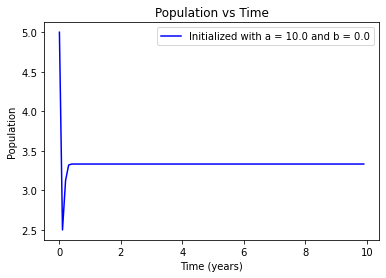

In [2]:
#Solving rate of change of population using the Euler Method
import matplotlib.pyplot as plt
from numpy import arange

#initial conditions of population
#N(0), we can change
N = 5
a = 10.0
b = 3.0

#interval over which to plot/of solution

ll = 0.0
rl = 10.0

#function f(N) describing derivative of N
def f(N,t):
    return a*N - b*(N**2)

#timesteps
timesteps = [0.1,0.5,1,2,5]

# set up arrays of values t, x
tpoints = arange(ll,rl,0.1)
xpoints = []
for t in tpoints:
    xpoints.append(N)
    N += 0.1*f(N,t) # advance x with an Euler step

# plot the solution
plt.plot(tpoints, xpoints,'b-',label='Initialized with a = 10.0 and b = 0.0')
plt.legend(loc="best")
plt.title("Population vs Time")
plt.xlabel("Time (years)")
plt.ylabel("Population")
plt.show()    

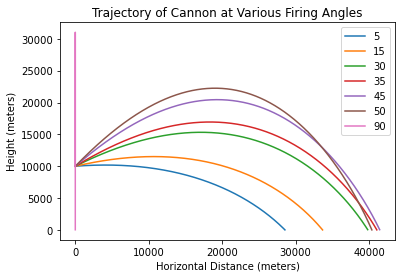

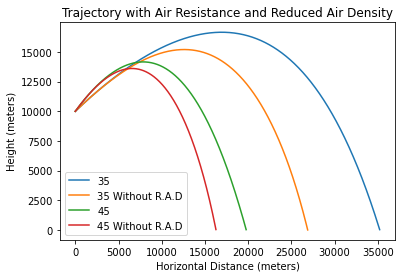

In [4]:
#Calculating trajectory of a cannon shell

import matplotlib.pyplot as plt
from numpy import arange,exp
from math import cos, sin, pi, sqrt

#Defining Importat Variables
y_0 = 1.0E4
air_resistance = 4.0E-5
v = 700.0
rho_0 = 1.225
g = 9.81

#initial conditions
x = 0.0
#vx = v * cos(((theta*2.0*pi)/360.0))
#vy = v * sin(((theta*2.0*pi)/360.0))        
#timestep
h = 0.1

#def rad_converter(x):
#    return (x*2.0*pi)/360.0
#thetarad = map(rad_converter,theta)

def rho(y):
    return rho_0*exp(-y/y_0)

theta = [5,15,30,35,45,50,90]

#2nd order ODE's after splitting into first order ODE's
#Adding air density thing
for t in theta:
    #initial conditions
    x1 = 0.0
    y1 = 1.0E4
    theta1 = (t*2.0*pi)/360.0
    vx1 = v * cos(theta1)
    vy1 = v * sin(theta1)
    
    #define lists
    x1points = []
    y1points = []
    vx1points = []
    vy1points = []
    
    while y1 >= 0.0:
        x1points.append(x1)
        y1points.append(y1)
        vx1points.append(vx1)
        vy1points.append(vy1)
        x1 += vx1 * h
        y1 += vy1 * h
        v1 = sqrt(vx1**2 + vy1**2)
        vx1 -= rho(y1)/rho_0 * air_resistance * v * vx1 * h
        vy1 -= (g*h + ( rho(y1)/rho_0 * air_resistance * v1 * vy1 * h))
    plt.plot(x1points,y1points,label=t)
plt.ylabel("Height (meters)")
plt.xlabel("Horizontal Distance (meters)")
plt.legend(loc="best")
plt.title("Trajectory of Cannon at Various Firing Angles")
plt.show()

#Commented out but used to check graphs with Air Resistance but without Reduced Air Density
""" for t in theta:
    #initial conditions
    x = 0.0
    y = 1.0E4
    theta = (t*2.0*pi)/360.0
    vx = v * cos(theta)
    vy = v * sin(theta)
    
    #define lists
    xpoints = []
    ypoints = []
    vxpoints = []
    vypoints = []
    
    while y >= 0.0:
        xpoints.append(x)
        ypoints.append(y)
        vxpoints.append(vx)
        vypoints.append(vy)
        x += vx * h
        y += vy * h
        v = sqrt(vx**2 + vy**2)
        vx -= air_resistance * v * vx * h
        vy -= (g*h + (air_resistance * v * vy * h))
    plt.plot(xpoints,ypoints,label=t)
plt.title("Trajectory with Air Resistance")
plt.legend(loc="best")
#plt.show() """

theta = [35,45]

#Combining both graphs together
for t in theta:
    #initial conditions
    x1 = 0.0
    y1 = 1.0E4
    x = 0.0
    y = 1.0E4
    theta1 = (t*2.0*pi)/360.0
    vx1 = v * cos(theta1)
    vy1 = v * sin(theta1)
    vx = v * cos(theta1)
    vy = v* sin(theta1)
    
    #define lists
    xpoints = []
    ypoints = []
    vxpoints = []
    vypoints = []
    x1points = []
    y1points = []
    vx1points = []
    vy1points = []
    
    while y1 >= 0.0:
        x1points.append(x1)
        y1points.append(y1)
        vx1points.append(vx1)
        vy1points.append(vy1)
        x1 += vx1 * h
        y1 += vy1 * h
        v1 = sqrt(vx1**2 + vy1**2)
        vx1 -= rho(y)/rho_0 * air_resistance * v * vx1 * h
        vy1 -= (g*h + ( rho(y)/rho_0 * air_resistance * v1 * vy1 * h))
    plt.plot(x1points,y1points,label=t)
    while y >= 0.0:
        xpoints.append(x)
        ypoints.append(y)
        vxpoints.append(vx)
        vypoints.append(vy)
        x += vx * h
        y += vy * h
        v = sqrt(vx**2 + vy**2)
        vx -= air_resistance * v * vx * h
        vy -= (g*h + (air_resistance * v * vy * h))
    plt.plot(xpoints,ypoints,label=str(t)+" Without R.A.D")
plt.ylabel("Height (meters)")
plt.xlabel("Horizontal Distance (meters)")
plt.title("Trajectory with Air Resistance and Reduced Air Density")
plt.legend(loc="best")
plt.show()


#Commented out code used to simmulate ideal conditions (no air resistance or RAD)

#theta = [0,15,30,35,50,45,90]

""" for t in theta:
    #initial conditions
    v = 700.0
    x = 0.0
    y = 1.0E4
    theta = (t*2.0*pi)/360.0
    vx = v * cos(theta)
    vy = v * sin(theta)
    
    #define lists
    xpoints = []
    ypoints = []
    vxpoints = []
    vypoints = []
    
    while y >= 0.0:
        xpoints.append(x)
        ypoints.append(y)
        vxpoints.append(vx)
        vypoints.append(vy)
        x += vx * h
        y += vy * h
        v = sqrt(vx**2 + vy**2)
        vx = vx 
        vy -= g*h 
    plt.plot(xpoints,ypoints,label=t)
    plt.plot(x1points,y1points)
plt.xlim(0,60000)
plt.ylim(0,20000)
plt.title("Trajectory with Nothing")
plt.legend(loc="best")
#plt.show()


#plt.plot(xpoints,ypoints)
#plt.show()
#print(list(thetarad))

This is E we start with 0.6960000000000001


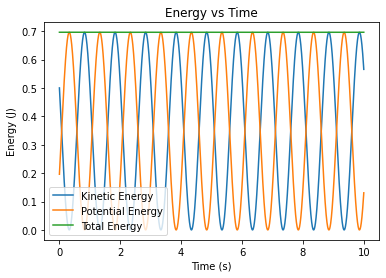

In [5]:
#Numerically Investigating the Stability of Euler-Cromer

from numpy import arange,exp
import matplotlib.pyplot as plt
from numpy import arange,exp
from math import cos, sin, pi, sqrt

#timestep
h = 0.0001

#other vairables

w = 1.0
theta = 0.2
g = 9.8
l = 1.0
m = 1.0
#interval over which to plot
a = 0.0
b = 10.0 
E = (1/2)*m*(l**2)*((w**2)+(g/l)*(theta**2))
K = (1/2)*m*(l**2)*(w**2)
P = (m/2)*g*l*(theta**2)
print("This is E we start with",E)
theta_points = []
tpoints = []
E_points = []
K_points = []
P_points = []
X_points = []
#E_ppoints = []
#E_kpoints = []
angle = arange(0,pi,h)

for i in arange(a,b,h):
    #x = K + P
    #X_points.append(x)
    K_points.append(K)
    P_points.append(P)
    theta_points.append(theta)
    tpoints.append(i)
    E_points.append(E)   
    w -= (g/l)*theta*h 
    theta += w * h #Euler Cromer Step
    E = (1/2)*m*(l**2)*((w**2)+(g/l)*(theta**2))
    K = (1/2)*m*(l**2) * (w**2) 
    P = (m/2)*g*l*(theta**2)
plt.plot(tpoints,K_points,label="Kinetic Energy")
plt.plot(tpoints,P_points,label="Potential Energy")
plt.plot(tpoints,E_points,label="Total Energy")
plt.title("Energy vs Time")
plt.legend(loc="lower left")
plt.xlabel("Time (s)")
plt.ylabel("Energy (J)")
#plt.plot(tpoints,X_points)
plt.show()

#plt.plot(tpoints,theta_points)
#plt.show()

#New Test
#t1points = []
#E1_points = []
#E1 = (1/2)*m*(l**2)*((w**2)+(g/l)*(0.2**2))
#for i in arange(a,b,h):
    #theta_points.append(theta)
    #t1points.append(i)
    #E1_points.append(E1)   
    #w1 = w - (g/l)*theta*h 
    #w = w1
    #theta += w * h #Euler Cromer Step


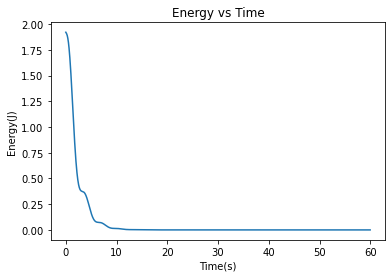

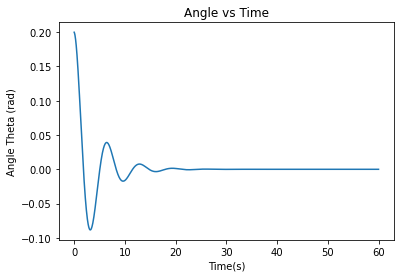

In [6]:
#Finding total energy for three different nonlinear, damped and forced pendulum systems

from numpy import arange,exp
import matplotlib.pyplot as plt
from numpy import arange,exp
from math import cos, sin, pi, sqrt

#Definging some Variables

q = 1/2
l = 9.8
g = 9.8
Omega_D = 2/3
m = 1

#TimeStep
h = 0.04

#initial conditions
theta = 0.2
w = 0.0
E = (1/2)*m*(l**2)*((w**2)+(g/l)*(theta**2))

a = 0.0
b = 60.0
#Driving Forces
FD = [0,0.5,1.2]

#Implementing Euler Cromer

thetapoints = []
time = []
Epoints = []

for i in arange(a,b,h):
    Epoints.append(E)
    w1 = w - ((sin(theta) + (q*w) - (0.0*sin(Omega_D*i)))*h)
    w = w1
    theta += w * h
    E = (1/2)*m*(l**2)*((w**2)+(g/l)*(theta**2))
    #print(theta)
    if theta >= pi:
        theta -= 2*pi
        #thetapoints.append(theta)
    elif theta <= -pi:
        theta += 2*pi
        #thetapoints.append(theta)
        #thetapoints.append(theta)
    else:
        pass
    thetapoints.append(theta)
    time.append(i)
    #print(theta)
plt.plot(time,Epoints)
plt.xlabel("Time(s)")
plt.ylabel("Energy(J)")
plt.title("Energy vs Time")
plt.show()
plt.plot(time,thetapoints)
plt.xlabel("Time(s)")
plt.ylabel("Angle Theta (rad)")
plt.title("Angle vs Time")
plt.show()
        